In [1]:
import jaxquantum as jqt
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax.scipy as jsp
import scipy as sp

/home/shanj/miniconda3/envs/jax-new/lib/python3.12/site-packages/qutip/__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


# Initial Sims

100% |██████████| [00:00<00:00, 3888.33%/s]


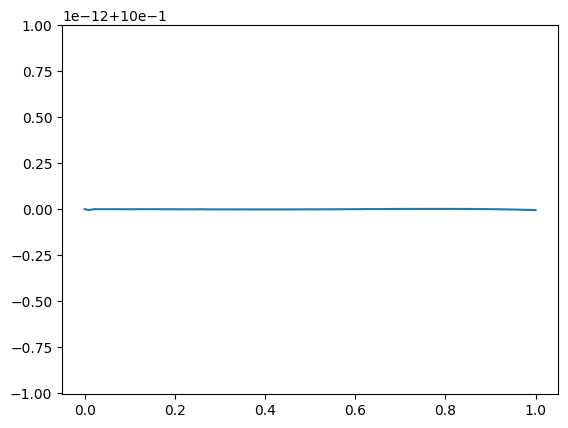

In [61]:
# Building Blocks 

N = 10
σz = jqt.sigmaz()
I = jqt.identity(2)
Ia = jqt.identity(N)

d_12 = (((I ^ I ^ I) - (σz ^ σz ^ I))/2) ^ Ia
d_23 = (((I ^ I ^ I) - (I ^ σz ^ σz))/2) ^ Ia 

a = I ^ I ^ I ^ jqt.destroy(N)
a_dag = I ^ I ^ I ^ jqt.create(N)

Gamma = 0.001
H_12 = jnp.sqrt(Gamma) * (d_12 @ a_dag + d_12.dag() @ a)
H_23 = jnp.sqrt(Gamma) * (d_23 @ a_dag + d_23.dag() @ a)

H = H_12 #  + H_23

kappa = 1
c_ops = [jnp.sqrt(kappa) * a]


g = jqt.basis(2,0)
e = jqt.basis(2,1)
vac = jqt.basis(N,0)

initial_state = e ^ g ^ g ^ vac

ts = jnp.linspace(0, 1, 101)

results = jqt.mesolve(initial_state, ts, c_ops, H)

σz1 = σz ^ I ^ I ^ Ia 
σz1_exp = jqt.calc_expect(σz1, results)

d_12_exp = jqt.calc_expect(d_12, results)
d_23_exp = jqt.calc_expect(d_23, results)

plt.plot(ts, jnp.real(d_12_exp))

100% |██████████| [00:00<00:00, 633.28%/s]


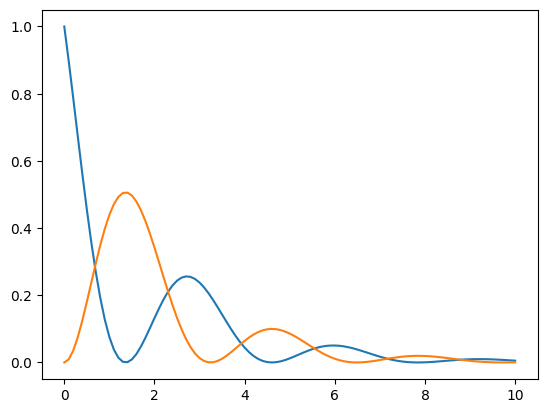

In [63]:
# Building Blocks 

Na = 10
Nb = 10

Ia = jqt.identity(Na)
Ib = jqt.identity(Nb)

a = jqt.destroy(Na) ^ Ib 
b = Ia ^ jqt.destroy(Nb)

H = a.dag() @ b + a @ b.dag()

kappa = 1
c_ops = [jnp.sqrt(kappa) * a]

initial_state = jqt.basis(Na,1) ^ jqt.basis(Nb,0)

ts = jnp.linspace(0, 10, 101)

results = jqt.mesolve(initial_state, ts, c_ops, H)

na = a.dag() @ a
nb = b.dag() @ b

na_exp = jqt.calc_expect(na, results)
nb_exp = jqt.calc_expect(nb, results)

plt.plot(ts, jnp.real(na_exp))
plt.plot(ts, jnp.real(nb_exp))

100% |██████████| [00:00<00:00, 16441.80%/s]


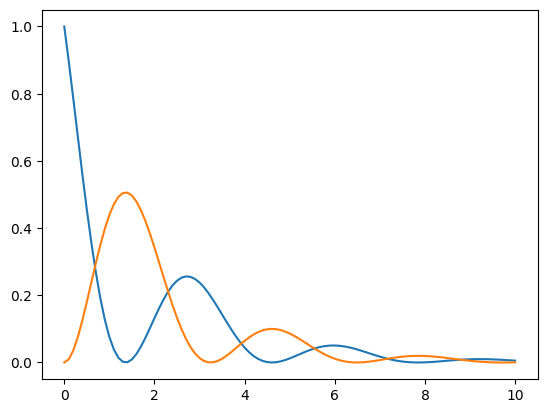

In [67]:
# Building Blocks 

Na = 10
Nb = 2

Ia = jqt.identity(Na)
Ib = jqt.identity(Nb)

a = jqt.destroy(Na) ^ Ib 
b = Ia ^ jqt.sigmap()

H = a.dag() @ b + a @ b.dag()

kappa = 1
c_ops = [jnp.sqrt(kappa) * a]

initial_state = jqt.basis(Na,1) ^ jqt.basis(Nb,0)

ts = jnp.linspace(0, 10, 101)

results = jqt.mesolve(initial_state, ts, c_ops, H)

na = a.dag() @ a
nb = b.dag() @ b

na_exp = jqt.calc_expect(na, results)
nb_exp = jqt.calc_expect(nb, results)

plt.plot(ts, jnp.real(na_exp))
plt.plot(ts, jnp.real(nb_exp))

100% |██████████| [00:00<00:00, 227.57%/s]


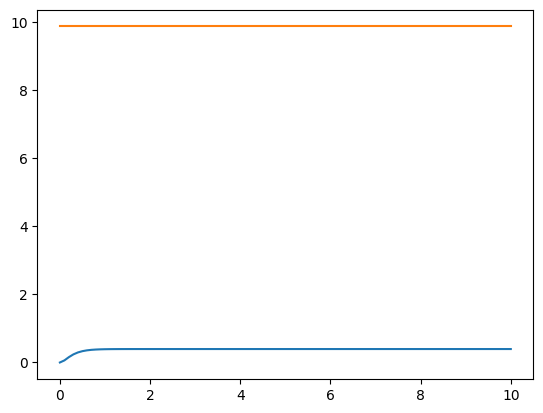

In [99]:
# Building Blocks 

Na = 10

Ia = jqt.identity(Na)
Iq = jqt.identity(2)

a = jqt.destroy(Na) ^ Iq ^ Iq
P = Ia ^ jqt.sigmaz() ^ jqt.sigmaz()
d = jqt.jnp2jqt(sp.linalg.logm(P.data), dims=P.dims)

H = (a.dag() @ d + a @ d.dag())

kappa = 10
c_ops = [jnp.sqrt(kappa) * a]

initial_state = jqt.basis(Na,0) ^ jqt.basis(2,1) ^ jqt.basis(2,0)

ts = jnp.linspace(0, 10, 101)

results = jqt.mesolve(initial_state, ts, c_ops, H)

na = a.dag() @ a
nd = d.dag() @ d 

na_exp = jqt.calc_expect(na, results)
nd_exp = jqt.calc_expect(nd, results)

plt.plot(ts, jnp.real(na_exp))
plt.plot(ts, jnp.real(nd_exp))

In [96]:
d.dag() @ (jqt.basis(Na,0) ^ jqt.basis(2,0) ^ jqt.basis(2,0))

Quantum array: dims = [[10, 2, 2], [1, 1, 1]], shape = (40, 1), type = ket
Qarray data =
[[0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]]

In [93]:
jnp.max(jnp.abs((d.dag() - d).data))

Array(6.28318531, dtype=float64)

In [72]:
d @ (jqt.basis(Na,0) ^ jqt.basis(2,0) ^ jqt.basis(2,0))

Quantum array: dims = [[10, 2, 2], [1, 1, 1]], shape = (40, 1), type = ket
Qarray data =
[[0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]]

/opt/miniconda3/envs/jax-framework/lib/python3.9/site-packages/scipy/linalg/_matfuncs.py:204: LogmExactlySingularWarning: The logm input matrix is exactly singular.
  F = scipy.linalg._matfuncs_inv_ssq._logm(A)
100% |██████████| [00:01<00:00, 52.40%/s]


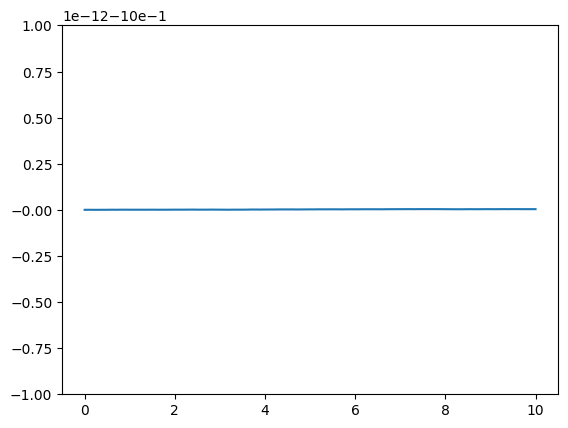

In [123]:
# Building Blocks 

Na = 10

g = jqt.basis(2,0)
e = jqt.basis(2,1)
vac = jqt.basis(Na,0)

Ia = jqt.identity(Na)
Iq = jqt.identity(2)

a = jqt.destroy(Na) ^ Iq ^ Iq
P = Ia ^ jqt.sigmaz() ^ jqt.sigmaz()

gg = vac ^ g ^ g
ge = vac ^ g ^ e
eg = vac ^ e ^ g
ee = vac ^ e ^ e

op = gg @ gg.dag() + (gg + ee)/2 @ ge.dag() + (gg - ee)/2 @ eg.dag() + ee @ ee.dag() 
op = jqt.jnp2jqt(sp.linalg.logm(op.data), dims=op.dims)

H = op @ a.dag() + op.dag() @ a

kappa = 10
c_ops = [jnp.sqrt(kappa) * a]

initial_state = jqt.basis(Na,0) ^ jqt.basis(2,1) ^ jqt.basis(2,0)

ts = jnp.linspace(0, 10, 101)

results = jqt.mesolve(initial_state, ts, c_ops, H)

na = a.dag() @ a

na_exp = jqt.calc_expect(na, results)
P_exp = jqt.calc_expect(P, results)

# plt.plot(ts, jnp.real(na_exp))
plt.plot(ts, jnp.real(P_exp))

# Sim 0.1.0

100% |██████████| [00:00<00:00, 3375.15%/s]


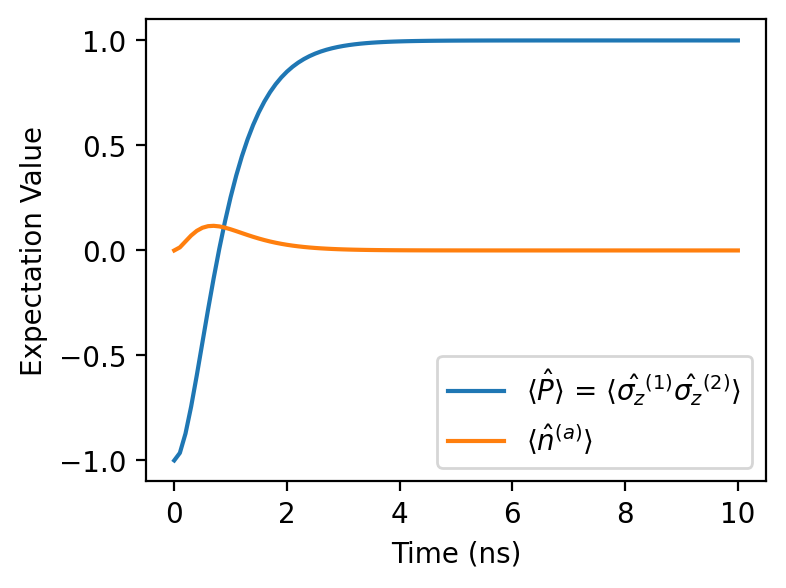

In [246]:
# Building Blocks 

Na = 10

g = jqt.basis(2,0)
e = jqt.basis(2,1)
vac = jqt.basis(Na,0)

Ia = jqt.identity(Na)
Iq = jqt.identity(2)

a = jqt.destroy(Na) ^ Iq ^ Iq
P = Ia ^ jqt.sigmaz() ^ jqt.sigmaz()

gg = g ^ g
ge = g ^ e
eg = e ^ g
ee = e ^ e

op = (gg + ee) @ ge.dag() + (gg - ee) @ eg.dag() # Normalization is probably off...
# op += gg @ gg.dag()
# op += ee @ ee.dag()
op = Ia ^ op 
H =  op @ a.dag()  + op.dag() @ a

kappa = 2 * jnp.pi * 1
c_ops = [jnp.sqrt(kappa) * a]

initial_state = vac ^ g ^ e

ts = jnp.linspace(0, 10, 101)

results = jqt.mesolve(initial_state, ts, c_ops, H)

na = a.dag() @ a

na_exp = jqt.calc_expect(na, results)
P_exp = jqt.calc_expect(P, results)

# plt.plot(ts, jnp.real(na_exp))

fig, ax = plt.subplots(1,1, figsize=(4,3), dpi=200)
ax.plot(ts, jnp.real(P_exp), label=r"$\langle \hat{P}\rangle$ = $\langle \hat{\sigma_z}^{(1)} \hat{\sigma_z}^{(2)}\rangle$")
ax.plot(ts, jnp.real(na_exp), label=r"$\langle \hat{n}^{(a)}\rangle$")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectation Value")
plt.legend()

In [192]:
jqt.ptrace(results[-1], 2)

Quantum array: dims = [[2], [2]], shape = (2, 2), type = oper
Qarray data =
[[0.50000187+0.j 0.        +0.j]
 [0.        +0.j 0.49999813+0.j]]

# Sim 0.1.1

100% |██████████| [00:01<00:00, 73.77%/s] 


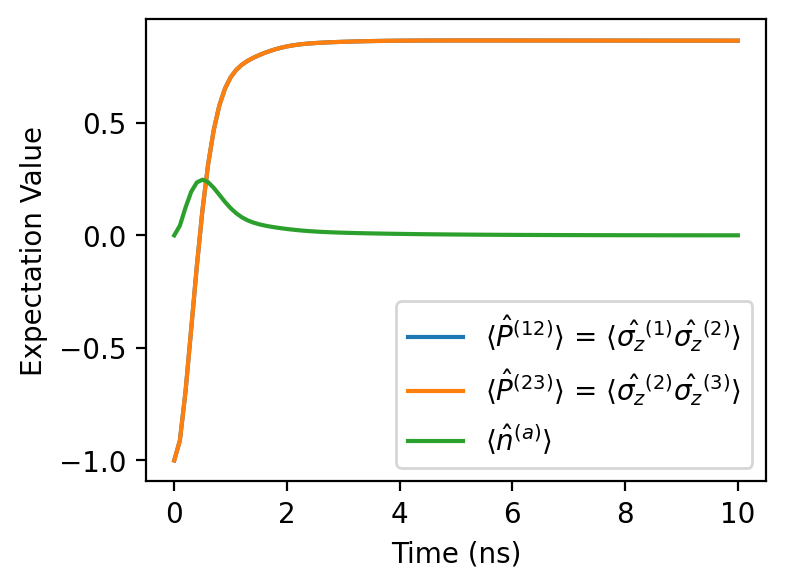

In [277]:
# Building Blocks -----

Na = 10

g = jqt.basis(2,0)
e = jqt.basis(2,1)
vac = jqt.basis(Na,0)
Ia = jqt.identity(Na)
Iq = jqt.identity(2)


gg = g ^ g
ge = g ^ e
eg = e ^ g
ee = e ^ e
P = jqt.sigmaz() ^ jqt.sigmaz()

dij = (gg + ee) @ ge.dag() + (gg - ee) @ eg.dag() # Normalization is probably off...
# dij += gg @ gg.dag()
# dij += ee @ ee.dag()
# -----

# Full Hilbert Space Operators -----
a = jqt.destroy(Na) ^ Iq ^ Iq ^ Iq
P12 = Ia ^ P ^ Iq
P23 = Ia ^ Iq ^ P

dij = (gg + ee) @ ge.dag() + (gg - ee) @ eg.dag() # Normalization is probably off...
d12 = Ia ^ dij ^ Iq
d23 = Ia ^ Iq ^ dij
# -----


# System -----
H12 =  a.dag() @ d12 + d12.dag() @ a
H23 =  a.dag() @ d23 + d23.dag() @ a
H = H12 + H23

kappa = 2 * jnp.pi * 1
c_ops = [jnp.sqrt(kappa) * a]
# -----

# Sim Settings -----
initial_state = vac ^ g ^ e ^ g
ts = jnp.linspace(0, 10, 101)
# -----

# Run & Calc Expectations -----
results = jqt.mesolve(initial_state, ts, c_ops, H)

na = a.dag() @ a
na_exp = jqt.calc_expect(na, results)
P12_exp = jqt.calc_expect(P12, results)
P23_exp = jqt.calc_expect(P23, results)
# -----

# Plot -----
fig, ax = plt.subplots(1,1, figsize=(4,3), dpi=200)
ax.plot(ts, jnp.real(P12_exp), label=r"$\langle \hat{P}^{(12)}\rangle$ = $\langle \hat{\sigma_z}^{(1)} \hat{\sigma_z}^{(2)}\rangle$")
ax.plot(ts, jnp.real(P23_exp), label=r"$\langle \hat{P}^{(23)}\rangle$ = $\langle \hat{\sigma_z}^{(2)} \hat{\sigma_z}^{(3)}\rangle$")
ax.plot(ts, jnp.real(na_exp), label=r"$\langle \hat{n}^{(a)}\rangle$")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectation Value")
plt.legend()
# -----

In [274]:
jqt.ptrace(results[-1], 3)

Quantum array: dims = [[2], [2]], shape = (2, 2), type = oper
Qarray data =
[[0.62870139+0.j 0.        +0.j]
 [0.        +0.j 0.37129861+0.j]]

# Sim 0.1.2

100% |██████████| [00:00<00:00, 2766.33%/s]


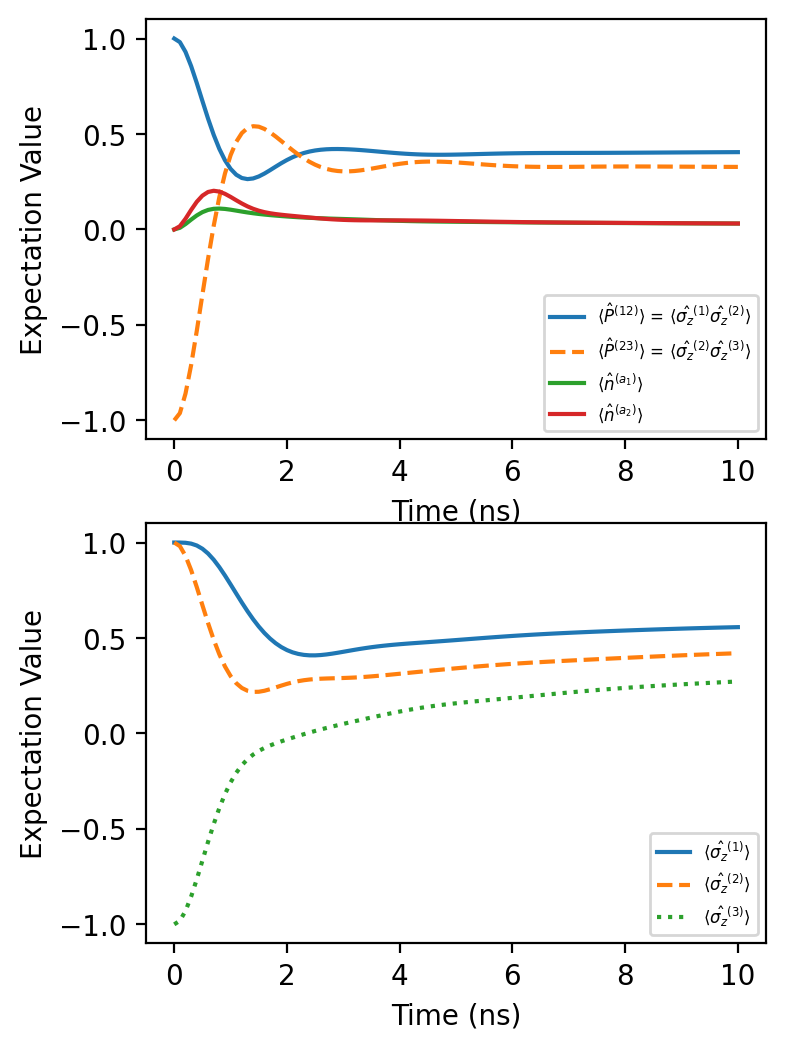

In [317]:
# Building Blocks -----

Na = 2

g = jqt.basis(2,0)
e = jqt.basis(2,1)
vac = jqt.basis(Na,0)
Ia = jqt.identity(Na)
Iq = jqt.identity(2)
σz = jqt.sigmaz()

Ibath = Ia ^ Ia 

gg = g ^ g
ge = g ^ e
eg = e ^ g
ee = e ^ e
P = jqt.sigmaz() ^ jqt.sigmaz()

dij = (gg + ee) @ ge.dag() + (gg - ee) @ eg.dag() # Normalization is probably off...
dij += gg @ gg.dag()
dij += ee @ ee.dag()
# -----

# Full Hilbert Space Operators -----
a1 = jqt.destroy(Na) ^ Ia ^ Iq ^ Iq ^ Iq
a2 = Ia ^ jqt.destroy(Na) ^ Iq ^ Iq ^ Iq
P12 = Ibath ^ P ^ Iq
P23 = Ibath ^ Iq ^ P

# dij = (gg + ee) @ ge.dag() + (gg - ee) @ eg.dag() # Normalization is probably off...
d12 = Ibath ^ dij ^ Iq
d23 = Ibath ^ Iq ^ dij

σz1 = Ibath ^ σz ^ Iq ^ Iq
σz2 = Ibath ^ Iq ^ σz ^ Iq
σz3 = Ibath ^ Iq ^ Iq ^ σz
# -----


# System -----
H12 =  a1.dag() @ d12 + d12.dag() @ a1
H23 =  a2.dag() @ d23 + d23.dag() @ a2
H = H12 + H23

kappa = 2 * jnp.pi * 0.5
c_ops = [jnp.sqrt(kappa) * a1, jnp.sqrt(kappa) * a2]
# -----

# Sim Settings -----
initial_state = vac ^ vac ^ g ^ g ^ e
ts = jnp.linspace(0, 10, 101)
# -----

# Run & Calc Expectations -----
results = jqt.mesolve(initial_state, ts, c_ops, H)

na1 = a1.dag() @ a1
na2 = a2.dag() @ a2
na1_exp = jqt.calc_expect(na1, results)
na2_exp = jqt.calc_expect(na2, results)
P12_exp = jqt.calc_expect(P12, results)
P23_exp = jqt.calc_expect(P23, results)
σz1_exp = jqt.calc_expect(σz1, results)
σz2_exp = jqt.calc_expect(σz2, results)
σz3_exp = jqt.calc_expect(σz3, results)
# -----

# Plot -----
fig, axs = plt.subplots(2,1, figsize=(4,6), dpi=200)
ax = axs[0]
ax.plot(ts, jnp.real(P12_exp), label=r"$\langle \hat{P}^{(12)}\rangle$ = $\langle \hat{\sigma_z}^{(1)} \hat{\sigma_z}^{(2)}\rangle$")
ax.plot(ts, jnp.real(P23_exp), linestyle="--", label=r"$\langle \hat{P}^{(23)}\rangle$ = $\langle \hat{\sigma_z}^{(2)} \hat{\sigma_z}^{(3)}\rangle$")
ax.plot(ts, jnp.real(na1_exp), label=r"$\langle \hat{n}^{(a_1)}\rangle$")
ax.plot(ts, jnp.real(na2_exp), label=r"$\langle \hat{n}^{(a_2)}\rangle$")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectation Value")
ax.legend(fontsize=6)

ax = axs[1]
ax.plot(ts, jnp.real(σz1_exp), label=r"$\langle \hat{\sigma_z}^{(1)}\rangle$") 
ax.plot(ts, jnp.real(σz2_exp), linestyle="--", label=r"$\langle \hat{\sigma_z}^{(2)}\rangle$")
ax.plot(ts, jnp.real(σz3_exp), linestyle=":", label=r"$\langle \hat{\sigma_z}^{(3)}\rangle$")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectation Value")
ax.legend(fontsize=6)
# -----

# Sim 0.1.3

100% |██████████| [00:00<00:00, 2080.43%/s]


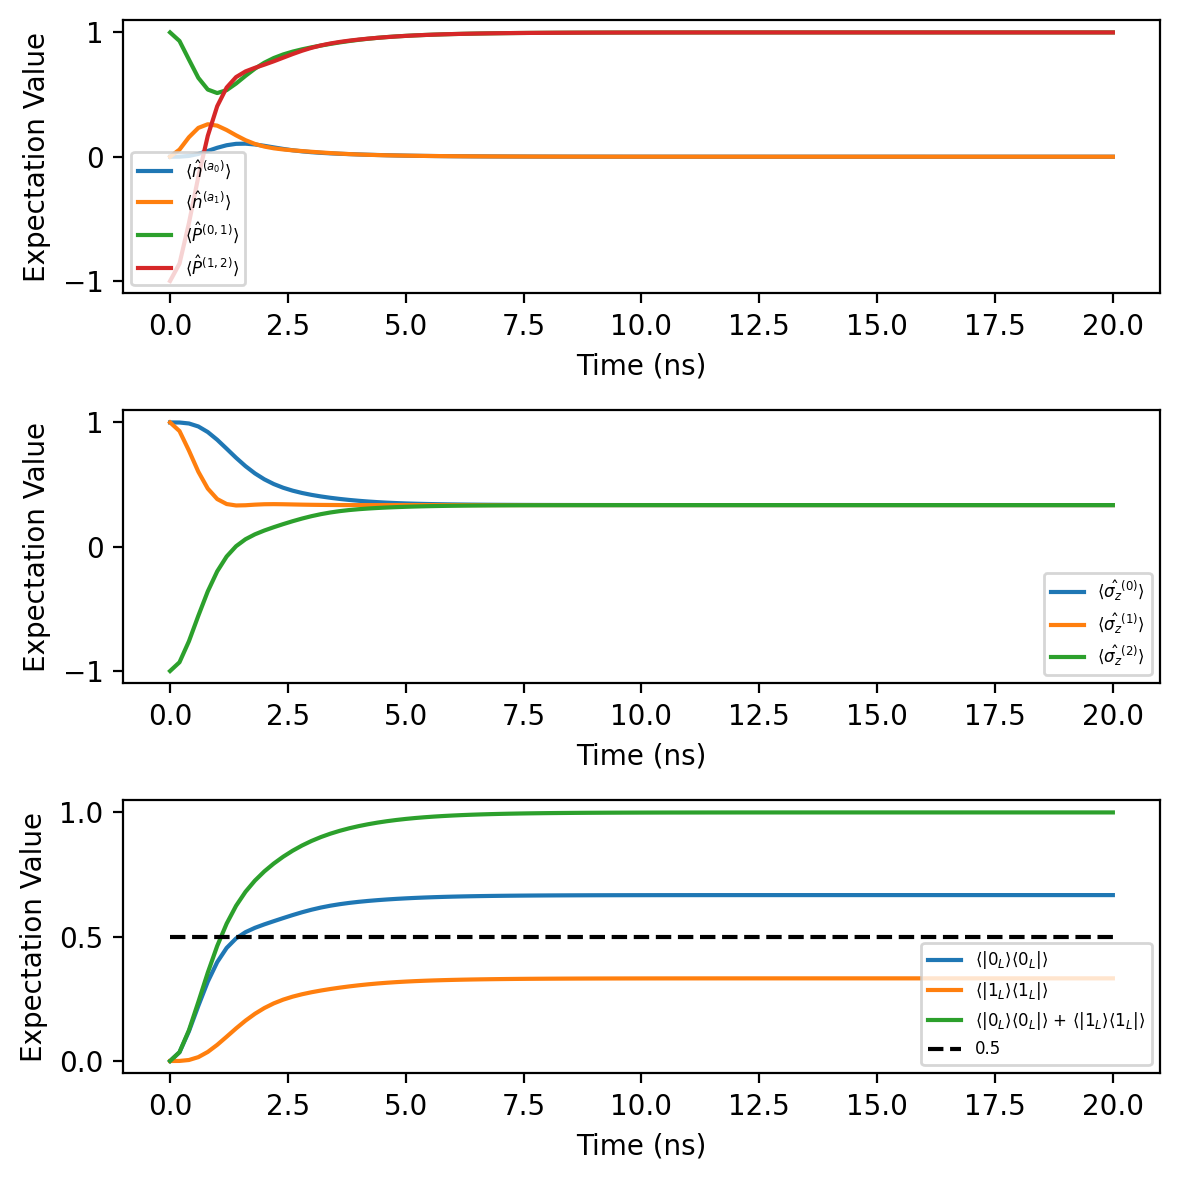

In [354]:
# Settings -----
num_qubits = 3
Na = 2
initial_qubit_state = g ^ g ^ e 
ts = jnp.linspace(0, 20, 101)
kappa = 2 * jnp.pi * 0.5
# -----

# Building Blocks -----
num_baths = num_qubits - 1

g = jqt.basis(2,0)
e = jqt.basis(2,1)
a = jqt.destroy(Na)
vac = jqt.basis(Na,0)
Ia = jqt.identity(Na)
Iq = jqt.identity(2)
σz = jqt.sigmaz()


Ibath = Ia 
for _ in range(num_baths - 1):
    Ibath = Ibath ^ Ia

vac_bath = vac 
for _ in range(num_baths - 1):
    vac_bath = vac_bath ^ vac

Iqubits = Iq
for _ in range(num_qubits - 1):
    Iqubits = Iqubits ^ Iq

all_g = g 
for _ in range(num_qubits - 1):
    all_g = all_g ^ g

all_e = e
for _ in range(num_qubits - 1):
    all_e = all_e ^ e

projector_g = all_g @ all_g.dag()
projector_e = all_e @ all_e.dag()

gg = g ^ g
ge = g ^ e
eg = e ^ g
ee = e ^ e
P = jqt.sigmaz() ^ jqt.sigmaz()

dij = (gg + ee) @ ge.dag() + (gg - ee) @ eg.dag() # Normalization is probably off...
# dij += gg @ gg.dag()
# dij += ee @ ee.dag()
# -----

# Full Hilbert Space Operators -----
def extend_op(op, i, is_qubit=False, two_qubits=False):
    if is_qubit:
        extended_op = Ibath 
        max_j = num_qubits if not two_qubits else num_qubits - 1
        for j in range(max_j):
            if j == i:
                extended_op = extended_op ^ op
            else:
                extended_op = extended_op ^ Iq
    else:
        extended_op = Iqubits
        for j in range(num_baths):
            if j == num_baths - 1 - i:
                extended_op = op ^ extended_op
            else:
                extended_op = Ia ^ extended_op
    return extended_op

a_ops = [extend_op(a, i, is_qubit=False) for i in range(num_baths)]
n_ops = [extend_op(a.dag() @ a, i, is_qubit=False) for i in range(num_baths)]
P_ops = [extend_op(P, i, is_qubit=True, two_qubits=True) for i in range(num_baths)]
d_ops = [extend_op(dij, i, is_qubit=True, two_qubits=True) for i in range(num_baths)]
σz_ops = [extend_op(σz, i, is_qubit=True) for i in range(num_qubits)]

projector_g_op = Ibath ^ projector_g
projector_e_op = Ibath ^ projector_e
# -----


# System -----
Hs =  [a_op.dag() @ d_op + a_op @ d_op.dag() for a_op, d_op in zip(a_ops, d_ops)]
H = sum(Hs)

c_ops = [jnp.sqrt(kappa) * a_op for a_op in a_ops]
initial_state = vac_bath ^ initial_qubit_state
# -----

# Run & Calc Expectations -----
results = jqt.mesolve(initial_state, ts, c_ops, H)

bath_exps = {}

for j in range(num_baths):
    n_label = r"$\langle \hat{n}^{(a_" + f"{j}" + r")}\rangle$"
    bath_exps[n_label] = jqt.calc_expect(n_ops[j], results)

for j in range(num_baths):
    P_label = r"$\langle \hat{P}^{(" + f"{j},{j+1}" + r")}\rangle$"
    bath_exps[P_label] = jqt.calc_expect(P_ops[j], results)

qubit_exps = {}

for j in range(num_qubits):
    σz_label = r"$\langle \hat{\sigma_z}^{(" + f"{j}" + r")}\rangle$"
    qubit_exps[σz_label] = jqt.calc_expect(σz_ops[j], results)

projector_exps = {}
label_0 = r"$\langle|0_L\rangle \langle 0_L|\rangle$"
label_1 = r"$\langle|1_L\rangle \langle 1_L|\rangle$"
projector_exps[label_0] = jqt.calc_expect(projector_g_op, results)
projector_exps[label_1] = jqt.calc_expect(projector_e_op, results)
projector_exps[label_0 + " + " + label_1] = projector_exps[label_0] + projector_exps[label_1]

# -----

# Plot -----
fig, axs = plt.subplots(3,1, figsize=(6,6), dpi=200)
ax = axs[0]

for label, exp in bath_exps.items():
    ax.plot(ts, jnp.real(exp), label=label)

ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectation Value")
ax.legend(fontsize=6)

ax = axs[1]
for label, exp in qubit_exps.items():
    ax.plot(ts, jnp.real(exp), label=label)

ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectation Value")
ax.legend(fontsize=6)

ax = axs[2]
for label, exp in projector_exps.items():
    ax.plot(ts, jnp.real(exp), label=label)
ax.plot(ts, 0.5*jnp.ones_like(ts), linestyle="--", color="black", label="0.5")

ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectation Value")
ax.legend(fontsize=6)

fig.tight_layout()
# -----

In [356]:
projector_exps[label_1][-1]

Array(0.33252961+0.j, dtype=complex128)

# Sim 0.1.4

100% |██████████| [00:00<00:00, 2468.41%/s]


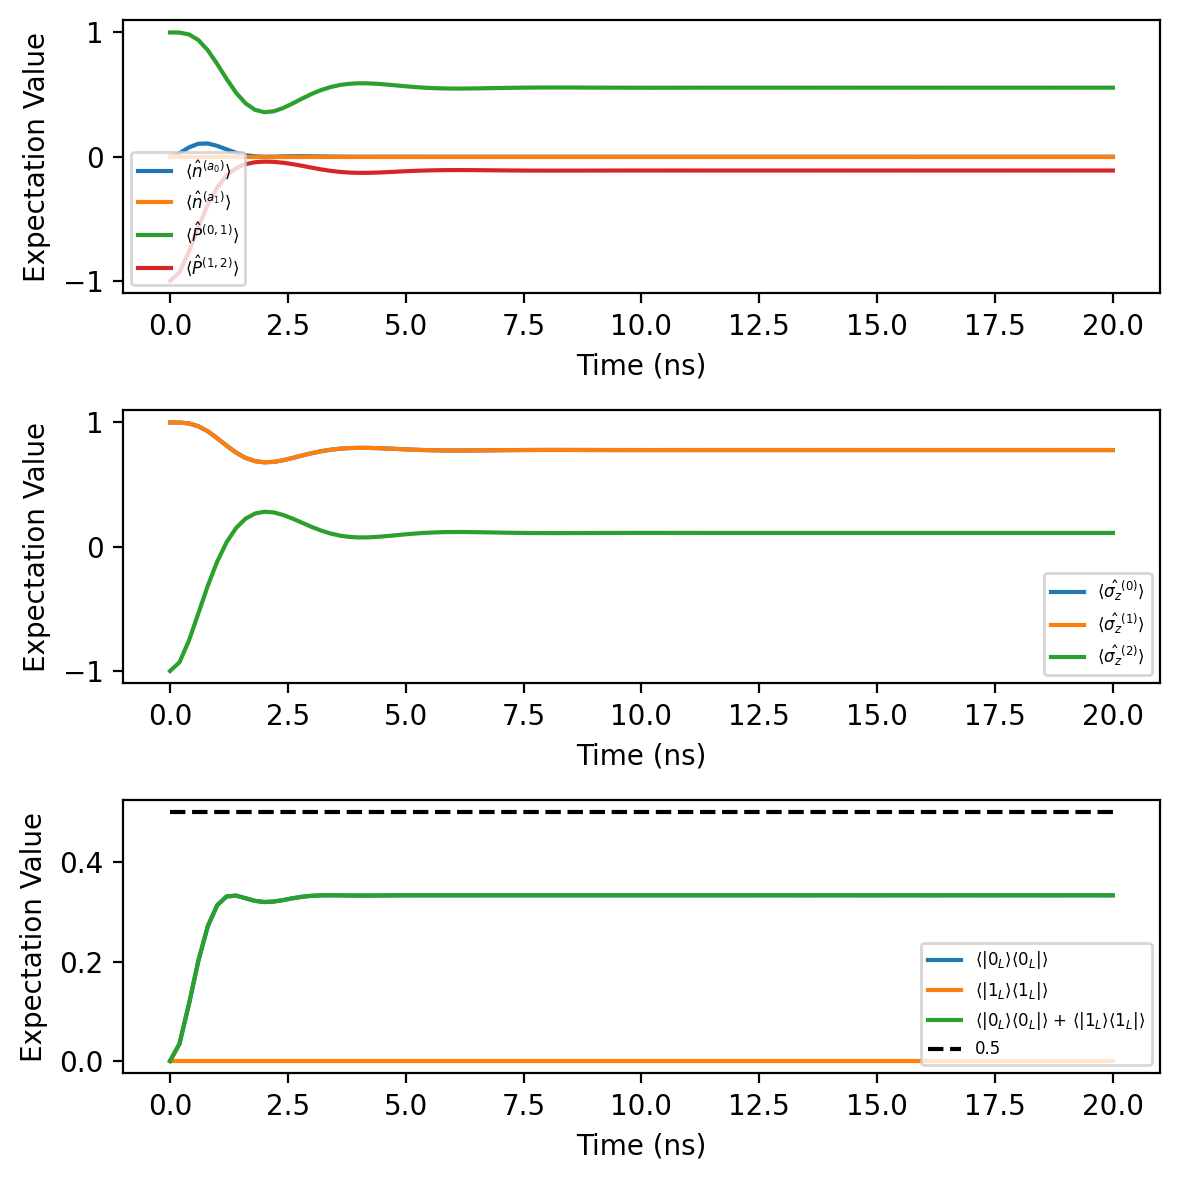

In [358]:
# Settings -----
num_qubits = 3
Na = 2
initial_qubit_state = g ^ g ^ e 
ts = jnp.linspace(0, 20, 101)
kappa = 2 * jnp.pi * 0.5
# -----

assert num_qubits == 3

# Building Blocks -----
num_baths = num_qubits - 1

g = jqt.basis(2,0)
e = jqt.basis(2,1)
a = jqt.destroy(Na)
vac = jqt.basis(Na,0)
Ia = jqt.identity(Na)
Iq = jqt.identity(2)
σz = jqt.sigmaz()


Ibath = Ia 
for _ in range(num_baths - 1):
    Ibath = Ibath ^ Ia

vac_bath = vac 
for _ in range(num_baths - 1):
    vac_bath = vac_bath ^ vac

Iqubits = Iq
for _ in range(num_qubits - 1):
    Iqubits = Iqubits ^ Iq

all_g = g 
for _ in range(num_qubits - 1):
    all_g = all_g ^ g

all_e = e
for _ in range(num_qubits - 1):
    all_e = all_e ^ e

projector_g = all_g @ all_g.dag()
projector_e = all_e @ all_e.dag()

gg = g ^ g
ge = g ^ e
eg = e ^ g
ee = e ^ e
P = jqt.sigmaz() ^ jqt.sigmaz()

dij = (gg + ee) @ ge.dag() + (gg - ee) @ eg.dag() # Normalization is probably off...
# dij += gg @ gg.dag()
# dij += ee @ ee.dag()
# -----

# Full Hilbert Space Operators -----
def extend_op(op, i, is_qubit=False, two_qubits=False):
    if is_qubit:
        extended_op = Ibath 
        max_j = num_qubits if not two_qubits else num_qubits - 1
        for j in range(max_j):
            if j == i:
                extended_op = extended_op ^ op
            else:
                extended_op = extended_op ^ Iq
    else:
        extended_op = Iqubits
        for j in range(num_baths):
            if j == num_baths - 1 - i:
                extended_op = op ^ extended_op
            else:
                extended_op = Ia ^ extended_op
    return extended_op

a_ops = [extend_op(a, i, is_qubit=False) for i in range(num_baths)]
n_ops = [extend_op(a.dag() @ a, i, is_qubit=False) for i in range(num_baths)]
P_ops = [extend_op(P, i, is_qubit=True, two_qubits=True) for i in range(num_baths)]
d_ops = [extend_op(dij, i, is_qubit=True, two_qubits=True) for i in range(num_baths)]
σz_ops = [extend_op(σz, i, is_qubit=True) for i in range(num_qubits)]

projector_g_op = Ibath ^ projector_g
projector_e_op = Ibath ^ projector_e
# -----


# System -----
# Hs =  [a_op.dag() @ d_op + a_op @ d_op.dag() for a_op, d_op in zip(a_ops, d_ops)]
# H = sum(Hs)

new_d = (e ^ e ^ e) @ ((e ^ e ^ g) + (e ^ g ^ e) + (g ^ e ^ e)).dag() + (g ^ g ^ g) @ ((g ^ g ^ e) + (g ^ e ^ g) + (e ^ g ^ g)).dag()
new_d = Ibath ^ new_d
H = a_ops[0].dag() @ new_d + a_ops[0] @ new_d.dag()

c_ops = [jnp.sqrt(kappa) * a_op for a_op in a_ops]
initial_state = vac_bath ^ initial_qubit_state
# -----

# Run & Calc Expectations -----
results = jqt.mesolve(initial_state, ts, c_ops, H)

bath_exps = {}

for j in range(num_baths):
    n_label = r"$\langle \hat{n}^{(a_" + f"{j}" + r")}\rangle$"
    bath_exps[n_label] = jqt.calc_expect(n_ops[j], results)

for j in range(num_baths):
    P_label = r"$\langle \hat{P}^{(" + f"{j},{j+1}" + r")}\rangle$"
    bath_exps[P_label] = jqt.calc_expect(P_ops[j], results)

qubit_exps = {}

for j in range(num_qubits):
    σz_label = r"$\langle \hat{\sigma_z}^{(" + f"{j}" + r")}\rangle$"
    qubit_exps[σz_label] = jqt.calc_expect(σz_ops[j], results)

projector_exps = {}
label_0 = r"$\langle|0_L\rangle \langle 0_L|\rangle$"
label_1 = r"$\langle|1_L\rangle \langle 1_L|\rangle$"
projector_exps[label_0] = jqt.calc_expect(projector_g_op, results)
projector_exps[label_1] = jqt.calc_expect(projector_e_op, results)
projector_exps[label_0 + " + " + label_1] = projector_exps[label_0] + projector_exps[label_1]

# -----

# Plot -----
fig, axs = plt.subplots(3,1, figsize=(6,6), dpi=200)
ax = axs[0]

for label, exp in bath_exps.items():
    ax.plot(ts, jnp.real(exp), label=label)

ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectation Value")
ax.legend(fontsize=6)

ax = axs[1]
for label, exp in qubit_exps.items():
    ax.plot(ts, jnp.real(exp), label=label)

ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectation Value")
ax.legend(fontsize=6)

ax = axs[2]
for label, exp in projector_exps.items():
    ax.plot(ts, jnp.real(exp), label=label)
ax.plot(ts, 0.5*jnp.ones_like(ts), linestyle="--", color="black", label="0.5")

ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectation Value")
ax.legend(fontsize=6)

fig.tight_layout()
# -----

# Sim 0.1.5

In [53]:
# jnp.max(jnp.abs(((Ibath ^ Iq ^ dij) - extend_op(dij, 1, is_qubit=True, two_qubits=True)).data))

Array(0., dtype=float64)

100% |██████████| [00:00<00:00, 2257.65%/s]


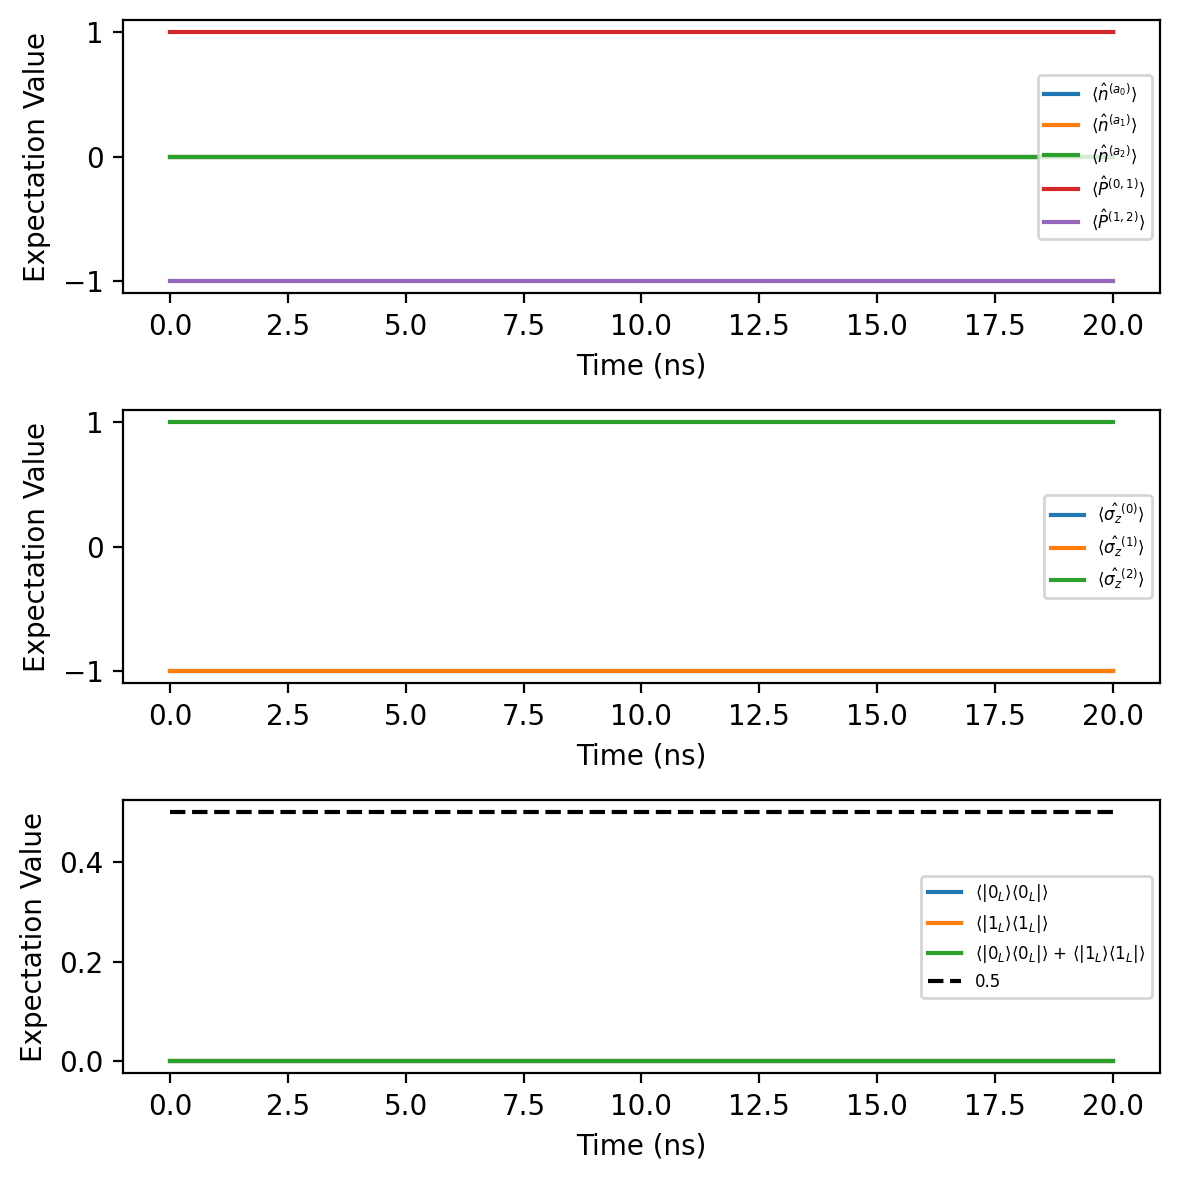

In [54]:
g = jqt.basis(2,0)
e = jqt.basis(2,1)

# Settings -----
num_qubits = 3
Na = 2
kappa = 2 * jnp.pi * 0.5
initial_qubit_state = e ^ e ^ g
ts = jnp.linspace(0, 20, 101)
# -----

# Building Blocks -----
num_baths = num_qubits

a = jqt.destroy(Na)
vac = jqt.basis(Na,0)
Ia = jqt.identity(Na)
Iq = jqt.identity(2)
σz = jqt.sigmaz()


Ibath = Ia 
for _ in range(num_baths - 1):
    Ibath = Ibath ^ Ia

vac_bath = vac 
for _ in range(num_baths - 1):
    vac_bath = vac_bath ^ vac

Iqubits = Iq
for _ in range(num_qubits - 1):
    Iqubits = Iqubits ^ Iq

all_g = g 
for _ in range(num_qubits - 1):
    all_g = all_g ^ g

all_e = e
for _ in range(num_qubits - 1):
    all_e = all_e ^ e

projector_g = all_g @ all_g.dag()
projector_e = all_e @ all_e.dag()

gg = g ^ g
ge = g ^ e
eg = e ^ g
ee = e ^ e
P = jqt.sigmaz() ^ jqt.sigmaz()

dij = (gg + ee) @ ge.dag() + (gg - ee) @ eg.dag() # Normalization is probably off...
# dij += gg @ gg.dag()
# dij += ee @ ee.dag()

# d_decoder = (g^g^g) @ ((g^g^e) + (g^e^g) + (e^g^g)).dag() + (e^e^e) @ ((e^e^g) + (e^g^e) + (g^e^e)).dag()
# -----

# Full Hilbert Space Operators -----
def extend_op(op, i, is_qubit=False, two_qubits=False):
    if is_qubit:
        extended_op = Ibath 
        max_j = num_qubits if not two_qubits else num_qubits - 1
        for j in range(max_j):
            if j == i:
                extended_op = extended_op ^ op
            else:
                extended_op = extended_op ^ Iq
    else:
        extended_op = Iqubits
        for j in range(num_baths):
            if j == num_baths - 1 - i:
                extended_op = op ^ extended_op
            else:
                extended_op = Ia ^ extended_op
    return extended_op

a_ops = [extend_op(a, i, is_qubit=False) for i in range(num_baths)]
d_ops = [extend_op(dij, i, is_qubit=True, two_qubits=True) for i in range(num_qubits - 1)]
n_ops = [extend_op(a.dag() @ a, i, is_qubit=False) for i in range(num_baths)]
P_ops = [extend_op(P, i, is_qubit=True, two_qubits=True) for i in range(num_qubits-1)]
σz_ops = [extend_op(σz, i, is_qubit=True) for i in range(num_qubits)]

projector_g_op = Ibath ^ projector_g
projector_e_op = Ibath ^ projector_e
# d_decoder = Ibath ^ d_decoder
# -----


# System -----
Hs =  [a_op.dag() @ d_op + a_op @ d_op.dag() for a_op, d_op in zip(a_ops[:-2], d_ops)]
H = sum(Hs)
# last_bath_indx = num_baths - 1
# H += a_ops[last_bath_indx].dag() @ d_decoder + a_ops[last_bath_indx] @ d_decoder.dag()


c_ops = [jnp.sqrt(kappa) * a_op for a_op in a_ops]
initial_state = vac_bath ^ initial_qubit_state
# -----

# Run & Calc Expectations -----
results = jqt.mesolve(initial_state, ts, c_ops, H)

bath_exps = {}

for j in range(num_baths):
    n_label = r"$\langle \hat{n}^{(a_" + f"{j}" + r")}\rangle$"
    bath_exps[n_label] = jqt.calc_expect(n_ops[j], results)

for j in range(num_baths-1):
    P_label = r"$\langle \hat{P}^{(" + f"{j},{j+1}" + r")}\rangle$"
    bath_exps[P_label] = jqt.calc_expect(P_ops[j], results)

qubit_exps = {}

for j in range(num_qubits):
    σz_label = r"$\langle \hat{\sigma_z}^{(" + f"{j}" + r")}\rangle$"
    qubit_exps[σz_label] = jqt.calc_expect(σz_ops[j], results)

projector_exps = {}
label_0 = r"$\langle|0_L\rangle \langle 0_L|\rangle$"
label_1 = r"$\langle|1_L\rangle \langle 1_L|\rangle$"
projector_exps[label_0] = jqt.calc_expect(projector_g_op, results)
projector_exps[label_1] = jqt.calc_expect(projector_e_op, results)
projector_exps[label_0 + " + " + label_1] = projector_exps[label_0] + projector_exps[label_1]

# -----

# Plot -----
fig, axs = plt.subplots(3,1, figsize=(6,6), dpi=200)
ax = axs[0]

for label, exp in bath_exps.items():
    ax.plot(ts, jnp.real(exp), label=label)

ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectation Value")
ax.legend(fontsize=6)

ax = axs[1]
for label, exp in qubit_exps.items():
    ax.plot(ts, jnp.real(exp), label=label)

ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectation Value")
ax.legend(fontsize=6)

ax = axs[2]
for label, exp in projector_exps.items():
    ax.plot(ts, jnp.real(exp), label=label)
ax.plot(ts, 0.5*jnp.ones_like(ts), linestyle="--", color="black", label="0.5")

ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectation Value")
ax.legend(fontsize=6)

fig.tight_layout()
# -----

# Sim 0.1.5.1

100% |██████████| [00:00<00:00, 159.12%/s]


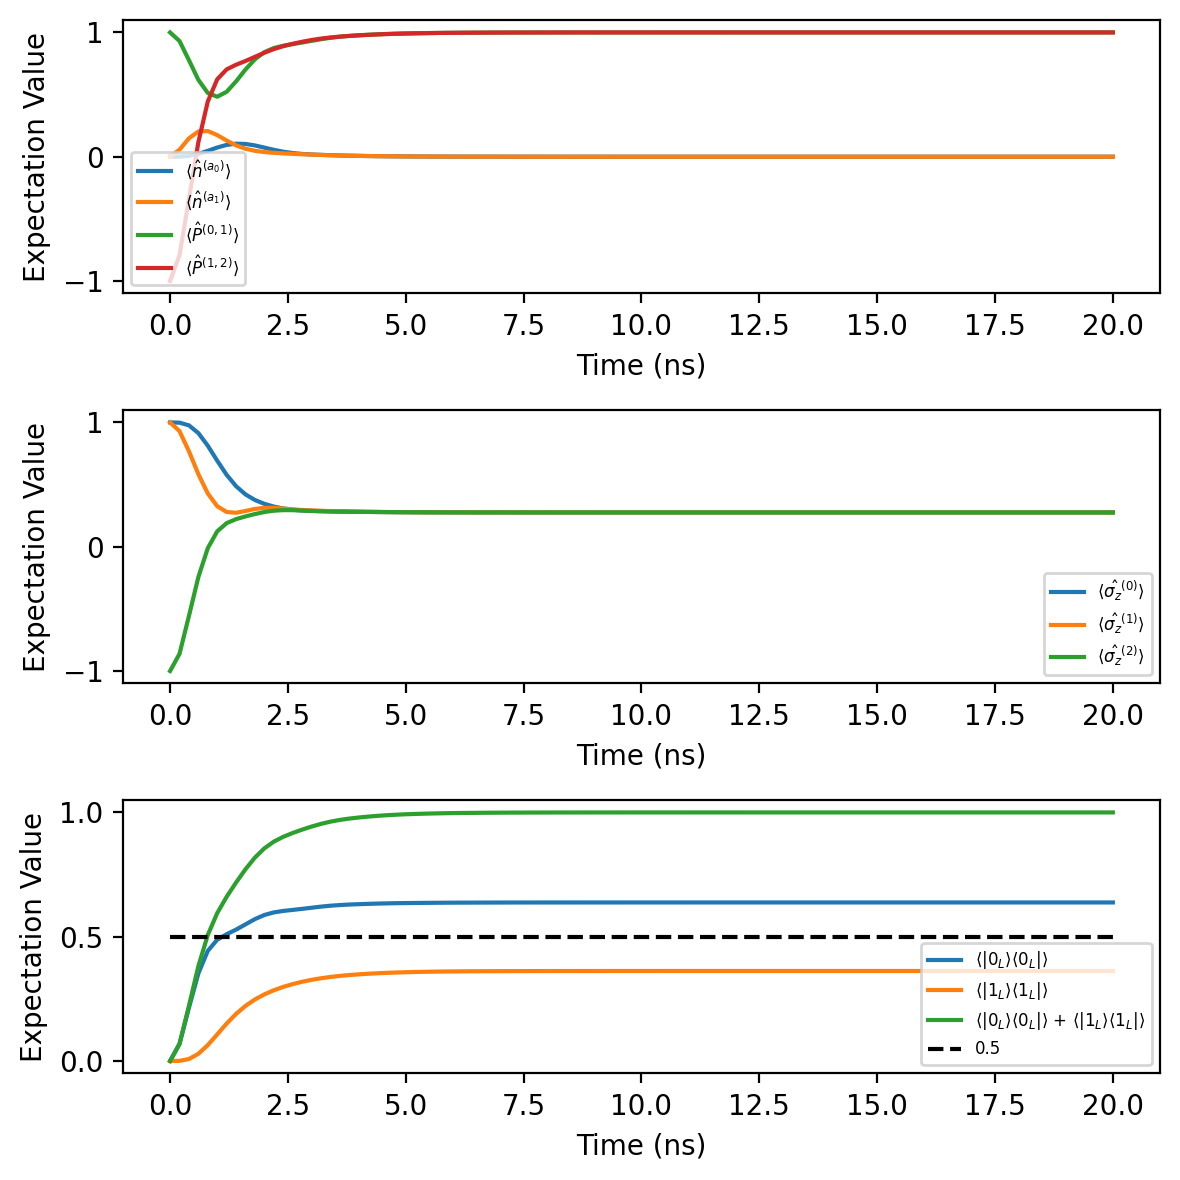

In [64]:
# Settings -----
num_qubits = 3
Na = 2
initial_qubit_state = g ^ g ^ e 
ts = jnp.linspace(0, 20, 101)
kappa = 2 * jnp.pi * 0.5
# -----

# Building Blocks -----
num_baths = num_qubits - 1

g = jqt.basis(2,0)
e = jqt.basis(2,1)
a = jqt.destroy(Na)
vac = jqt.basis(Na,0)
Ia = jqt.identity(Na)
Iq = jqt.identity(2)
σz = jqt.sigmaz()


Ibath = Ia 
for _ in range(num_baths - 1):
    Ibath = Ibath ^ Ia

vac_bath = vac 
for _ in range(num_baths - 1):
    vac_bath = vac_bath ^ vac

Iqubits = Iq
for _ in range(num_qubits - 1):
    Iqubits = Iqubits ^ Iq

all_g = g 
for _ in range(num_qubits - 1):
    all_g = all_g ^ g

all_e = e
for _ in range(num_qubits - 1):
    all_e = all_e ^ e

Idecoderbath = Ia

projector_g = all_g @ all_g.dag()
projector_e = all_e @ all_e.dag()

gg = g ^ g
ge = g ^ e
eg = e ^ g
ee = e ^ e
P = jqt.sigmaz() ^ jqt.sigmaz()

dij = (gg + ee) @ ge.dag() + (gg - ee) @ eg.dag() # Normalization is probably off...
# dij += gg @ gg.dag()
# dij += ee @ ee.dag()
d_decoder = (g^g^g) @ ((g^g^e) + (g^e^g) + (e^g^g)).dag() + (e^e^e) @ ((e^e^g) + (e^g^e) + (g^e^e)).dag()
# -----

# Full Hilbert Space Operators -----
def extend_op(op, i, is_qubit=False, two_qubits=False):
    if is_qubit:
        extended_op = Ibath 
        max_j = num_qubits if not two_qubits else num_qubits - 1
        for j in range(max_j):
            if j == i:
                extended_op = extended_op ^ op
            else:
                extended_op = extended_op ^ Iq
    else:
        extended_op = Iqubits
        for j in range(num_baths):
            if j == num_baths - 1 - i:
                extended_op = op ^ extended_op
            else:
                extended_op = Ia ^ extended_op
    return extended_op ^ Idecoderbath

a_ops = [extend_op(a, i, is_qubit=False) for i in range(num_baths)]
a_op_decoder = Ibath ^ Iqubits ^ a
n_ops = [extend_op(a.dag() @ a, i, is_qubit=False) for i in range(num_baths)]
P_ops = [extend_op(P, i, is_qubit=True, two_qubits=True) for i in range(num_baths)]
d_ops = [extend_op(dij, i, is_qubit=True, two_qubits=True) for i in range(num_baths)]
σz_ops = [extend_op(σz, i, is_qubit=True) for i in range(num_qubits)]

projector_g_op = Ibath ^ projector_g ^ Idecoderbath
projector_e_op = Ibath ^ projector_e ^ Idecoderbath

d_decoder_op = Ibath ^ d_decoder ^ Idecoderbath
# -----


# System -----
Hs =  [a_op.dag() @ d_op + a_op @ d_op.dag() for a_op, d_op in zip(a_ops, d_ops)]
H = sum(Hs)

H += a_op_decoder.dag() @ d_decoder_op + a_op_decoder @ d_decoder_op.dag()

c_ops = [jnp.sqrt(kappa) * a_op for a_op in a_ops] + [jnp.sqrt(kappa) * a_op_decoder]
initial_state = vac_bath ^ initial_qubit_state ^ vac
# -----

# Run & Calc Expectations -----
results = jqt.mesolve(initial_state, ts, c_ops, H)

bath_exps = {}

for j in range(num_baths):
    n_label = r"$\langle \hat{n}^{(a_" + f"{j}" + r")}\rangle$"
    bath_exps[n_label] = jqt.calc_expect(n_ops[j], results)

for j in range(num_baths):
    P_label = r"$\langle \hat{P}^{(" + f"{j},{j+1}" + r")}\rangle$"
    bath_exps[P_label] = jqt.calc_expect(P_ops[j], results)

qubit_exps = {}

for j in range(num_qubits):
    σz_label = r"$\langle \hat{\sigma_z}^{(" + f"{j}" + r")}\rangle$"
    qubit_exps[σz_label] = jqt.calc_expect(σz_ops[j], results)

projector_exps = {}
label_0 = r"$\langle|0_L\rangle \langle 0_L|\rangle$"
label_1 = r"$\langle|1_L\rangle \langle 1_L|\rangle$"
projector_exps[label_0] = jqt.calc_expect(projector_g_op, results)
projector_exps[label_1] = jqt.calc_expect(projector_e_op, results)
projector_exps[label_0 + " + " + label_1] = projector_exps[label_0] + projector_exps[label_1]

# -----

# Plot -----
fig, axs = plt.subplots(3,1, figsize=(6,6), dpi=200)
ax = axs[0]

for label, exp in bath_exps.items():
    ax.plot(ts, jnp.real(exp), label=label)

ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectation Value")
ax.legend(fontsize=6)

ax = axs[1]
for label, exp in qubit_exps.items():
    ax.plot(ts, jnp.real(exp), label=label)

ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectation Value")
ax.legend(fontsize=6)

ax = axs[2]
for label, exp in projector_exps.items():
    ax.plot(ts, jnp.real(exp), label=label)
ax.plot(ts, 0.5*jnp.ones_like(ts), linestyle="--", color="black", label="0.5")

ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectation Value")
ax.legend(fontsize=6)

fig.tight_layout()
# -----

# Sim 1.0.0

100% |██████████| [00:00<00:00, 1800.18%/s]


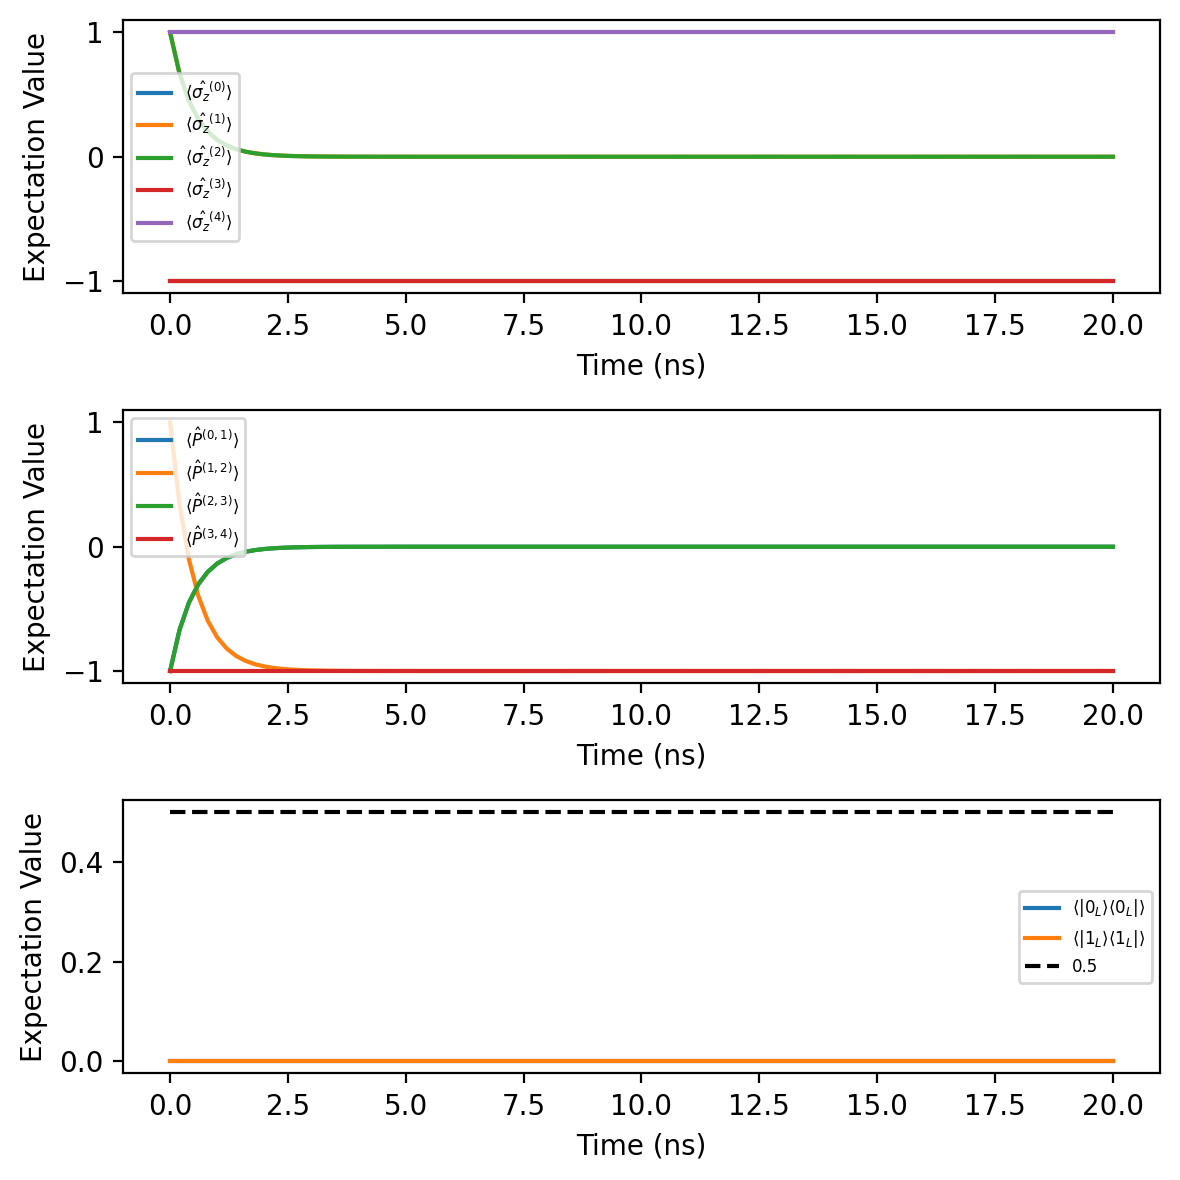

In [40]:
# Knobs -----
num_qubits = 5
string_length = num_qubits//2 + 1

ts = jnp.linspace(0, 20, 101)
g = jqt.basis(2,0)
e = jqt.basis(2,1)
initial_state = e ^ g ^ g ^ e ^ g
# -----

# Set up System -----
Iq = jqt.identity(2)

Ifull = Iq 
for _ in range(num_qubits - 1):
    Ifull = Ifull ^ Iq

all_g = g
for _ in range(num_qubits - 1):
    all_g = all_g ^ g

all_e = e
for _ in range(num_qubits - 1):
    all_e = all_e ^ e

projector_g = all_g @ all_g.dag()
projector_e = all_e @ all_e.dag()

loss_operators = []

Gamma_QEC = 1

def promote(op, j, two_qubit=False):
    full_op = None
    for k in range(num_qubits + (0 if not two_qubit else -1)):
        if k == j:
            full_op = op if full_op is None else full_op ^ op
        else:
            full_op = Iq if full_op is None else full_op ^ Iq
    return full_op

for i in range(num_qubits):
    loss_op = jnp.sqrt(Gamma_QEC)/(2**(string_length)) * (
        promote(jqt.sigmax(), i)
    ) 
    
    for k in range(string_length):
        loss_op_term = Ifull 
        for m in range(string_length):
            loss_op_term = loss_op_term @ (
                promote(jqt.sigmaz(), (i - (string_length - 1) + k + m)%num_qubits)
            )
        loss_op_term = (Ifull - loss_op_term)
        loss_op = loss_op @ loss_op_term

    # (
    #     Ifull - promote(jqt.sigmaz(), i) @ promote(jqt.sigmaz(), (i+1)% num_qubits)
    # ) @ (
    #     Ifull - promote(jqt.sigmaz(), i) @ promote(jqt.sigmaz(), (i-1)% num_qubits)
    # )
    loss_operators.append(loss_op)

H = 0 * Ifull
# -----


# Run -----
results = jqt.mesolve(initial_state, ts, loss_operators, H)
# -----


# Expectations -----
σz_ops = [promote(jqt.sigmaz(), i) for i in range(num_qubits)]
P_ops = [promote(jqt.sigmaz() ^ jqt.sigmaz(), i, two_qubit=True) for i in range(num_qubits-1)]

qubit_exps = {}

for j in range(num_qubits):
    σz_label = r"$\langle \hat{\sigma_z}^{(" + f"{j}" + r")}\rangle$"
    qubit_exps[σz_label] = jqt.calc_expect(σz_ops[j], results)


parity_exps = {}

for j in range(num_qubits-1):
    P_label = r"$\langle \hat{P}^{(" + f"{j},{j+1}" + r")}\rangle$"
    parity_exps[P_label] = jqt.calc_expect(P_ops[j], results)

projector_exps = {}
label_0 = r"$\langle|0_L\rangle \langle 0_L|\rangle$"
label_1 = r"$\langle|1_L\rangle \langle 1_L|\rangle$"
projector_exps[label_0] = jqt.calc_expect(projector_g, results)
projector_exps[label_1] = jqt.calc_expect(projector_e, results)
# projector_exps[label_0 + " + " + label_1] = projector_exps[label_0] + projector_exps[label_1]


# Plot -----
fig, axs = plt.subplots(3,1, figsize=(6,6), dpi=200)
ax = axs[0]

for label, exp in qubit_exps.items():
    ax.plot(ts, jnp.real(exp), label=label)

ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectation Value")
ax.legend(fontsize=6)

ax = axs[1]
for label, exp in parity_exps.items():
    ax.plot(ts, jnp.real(exp), label=label)

ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectation Value")
ax.legend(fontsize=6)

ax = axs[2]
for label, exp in projector_exps.items():
    ax.plot(ts, jnp.real(exp), label=label)
ax.plot(ts, 0.5*jnp.ones_like(ts), linestyle="--", color="black", label="0.5")

ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectation Value")
ax.legend(fontsize=6)

fig.tight_layout()
